In [38]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
def points_distance(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)
def is_point_inside_polygon(x_list, y_list, x, y):
    """
    Determines whether a point is inside a closed polygon.

    Parameters:
        x_list (list): A list of x-coordinates of the polygon vertices in order.
        y_list (list): A list of y-coordinates of the polygon vertices in order.
        x (float): The x-coordinate of the point to test.
        y (float): The y-coordinate of the point to test.

    Returns:
        bool: True if the point is inside the polygon, False otherwise.
    """
    n = len(x_list)
    inside = False
    p1x, p1y = x_list[0], y_list[0]
    for i in range(1, n + 1):
        p2x, p2y = x_list[i % n], y_list[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xinters:
                            inside = not inside
        p1x, p1y = p2x, p2y
    return inside


def circle_contour(center, radius, numberOfPoints, x_coordinates, y_coordinates):
    # Compute the angular resolution of the contour
    resolution = 2 * np.pi / numberOfPoints

    # Generate the contour points
    for i in range(numberOfPoints):
        # Compute the angle of the current contour point
        angle = i * resolution

        # Compute the x and y coordinates of the current contour point
        x = center[0] + radius * np.cos(angle)
        y = center[1] - radius * np.sin(angle)

        # Store the coordinates in the output arrays
        x_coordinates[i] = int(round(x))
        y_coordinates[i] = int(round(y))
    return x_coordinates,y_coordinates

def draw_contour(Image, numberOfPoints, x_coordinates, y_coordinates):
    for i in range(numberOfPoints):
        next = (i + 1) % numberOfPoints
        img = cv2.line(Image, (y_coordinates[i], x_coordinates[i]), (y_coordinates[next], x_coordinates[next]), (255, 0, 0), 2)
    # plt.imshow(img)
    # plt.axis('off')
    # plt.show()

def contour_area(numberOfPoints, x_coordinates, y_coordinates):
    area = 0.0
    # Calculate value of shoelace formula => 1/2 [ (x1y2 + x2y3 + … + xn-1yn + xny1) – (x2y1 + x3y2 + … + xnyn-1 + x1yn) ]
    j = numberOfPoints - 1
    for i in range(numberOfPoints):
        area += (x_coordinates[j] + x_coordinates[i]) * (y_coordinates[j] - y_coordinates[i])
        j = i # j is previous vertex to i
    return abs(area / 2.0)

def contour_perimeter(x_points, y_points, points_n):
    distance_sum = 0
    for i in range(points_n):
        next_point = i + 1
        if i == points_n - 1:
            next_point = 0

        distance = points_distance(x_points[i], y_points[i], x_points[next_point], y_points[next_point])
        distance_sum += distance
    return distance_sum


In [39]:

import math
# def internal_energy(x_points, y_points,points_n, alpha, beta):
#     curv_sum = 0
#     cont_sum = 0
#     avg_dist = contour_perimeter(x_points, y_points,len(x_points)) / len(x_points)
#     for i in range(len(x_points)):
#         next_point = (i + 1) % len(x_points)
#         prev_point = (i - 1) % len(x_points)
#         first_driv = points_distance(x_points[i], y_points[i], x_points[next_point], y_points[next_point])
#         cont_sum += (first_driv - avg_dist)**2
#         second_drev = (x_points[next_point] - 2 * x_points[i] + x_points[prev_point])**2 + (y_points[next_point] - 2 * y_points[i] + y_points[prev_point])**2
#         curv_sum += second_drev
#     energy = alpha * cont_sum + beta * curv_sum
#     return energy
import math

def internal_energy(x_points, y_points, points_n, alpha, beta):
    curv_sum = 0
    cont_sum = 0
    avg_dist = contour_perimeter(x_points, y_points, points_n) / points_n

    # Compute the average angle between adjacent line segments
    avg_angle = 0
    for i in range(points_n):
        next_point = (i + 1) % points_n
        dx = x_points[next_point] - x_points[i]
        dy = y_points[next_point] - y_points[i]
        angle = math.atan2(dy, dx)
        if angle < 0:
            angle += 2 * math.pi
        avg_angle += angle
    avg_angle /= points_n

    # Compute the energy due to contour smoothness and curvature
    for i in range(points_n):
        next_point = (i + 1) % points_n
        prev_point = (i + points_n - 1) % points_n

        # Compute the distance between adjacent contour points
        dist = points_distance(x_points[i], y_points[i], x_points[next_point], y_points[next_point])

        # Compute the deviation from the desired distance
        cont_dev = dist - avg_dist
        cont_sum += cont_dev * cont_dev

        # Compute the angle deviation between adjacent line segments
        dx1 = x_points[i] - x_points[prev_point]
        dy1 = y_points[i] - y_points[prev_point]
        dx2 = x_points[next_point] - x_points[i]
        dy2 = y_points[next_point] - y_points[i]
        angle1 = math.atan2(dy1, dx1)
        angle2 = math.atan2(dy2, dx2)
        if angle1 < 0:
            angle1 += 2 * math.pi
        if angle2 < 0:
            angle2 += 2 * math.pi
        curv_sum += abs(angle1 - angle2 - avg_angle) * abs(angle1 - angle2 - avg_angle)

    energy = alpha * cont_sum + beta * curv_sum
    return energy

# def internal_energy(x_points, y_points,points_n, alpha, beta):
#     curv_sum = 0
#     cont_sum = 0
#     avg_dist = contour_perimeter(x_points, y_points, points_n) / points_n

#     # Compute the average angle between adjacent line segments
#     avg_angle = 0
#     for i in range(points_n):
#         next_point = (i + 1) % points_n
#         dx = x_points[next_point] - x_points[i]
#         dy = y_points[next_point] - y_points[i]
#         angle = math.atan2(dy, dx)
#         if angle < 0:
#             angle += 2 * math.pi
#         avg_angle += angle
#     avg_angle /= points_n

#     # Compute the energy due to contour smoothness and curvature
#     for i in range(points_n):
#         next_point = (i + 1) % points_n
#         prev_point = (i + points_n - 1) % points_n

#         # Compute the distance between adjacent contour points
#         dist = points_distance(x_points[i], y_points[i], x_points[next_point], y_points[next_point])

#         # Compute the deviation from the desired distance
#         cont_dev = dist - avg_dist
#         cont_sum += cont_dev * cont_dev

#         # Compute the angle deviation between adjacent line segments
#         dx1 = x_points[i] - x_points[prev_point]
#         dy1 = y_points[i] - y_points[prev_point]
#         dx2 = x_points[next_point] - x_points[i]
#         dy2 = y_points[next_point] - y_points[i]
#         angle1 = math.atan2(dy1, dx1)
#         angle2 = math.atan2(dy2, dx2)
#         if angle1 < 0:
#             angle1 += 2 * math.pi
#         if angle2 < 0:
#             angle2 += 2 * math.pi
#         angle_dev = abs(angle1 - angle2)
#         if angle_dev > math.pi:
#             angle_dev = 2 * math.pi - angle_dev
#         curv_sum += angle_dev * angle_dev

#     energy = alpha * cont_sum + beta * curv_sum
#     return energy


In [40]:
import matplotlib.pyplot as plt
def external_energy(source):
    filtered_Gaussian = cv2.GaussianBlur(source, (3, 3), 0)
    gray = cv2.cvtColor(filtered_Gaussian, cv2.COLOR_BGR2GRAY)
    edges = (cv2.Canny(gray, 0, 255))
    # cv2.imshow('Grayscale Image', gray_img)
    

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(filtered_Gaussian, cv2.COLOR_BGR2GRAY)

    # Show the grayscale image
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.show()
    return edges



def window_neighbours(size):
    window = []
    point = []


    for i in range(-size // 2, size // 2 + 1):
        for j in range(-size // 2, size // 2 + 1):
            point = [i, j]
            window.append(point)

    return window

In [41]:
import matplotlib.pyplot as plt
def greedy_contour(source, iterations, alpha, beta, gamma, x_points, y_points, points_n, window_size, plot):
    sobel_energy = external_energy(source)
    window = window_neighbours(window_size)
    current_x = np.zeros(180)
    current_y = np.zeros(180)


    plot_img = None
    point_energy = 0
    min_energy = 0
    min_index = 0
    movements = 0
    iteration = 0
    loob = True
    threshold = 10
    neighbours_size = pow(window_size, 2)

    while loob:
        movements = 0

        for i in range(points_n):
            min_energy = float('inf')

            for j in range(neighbours_size):
                current_x[i] = x_points[i] + window[j][0]
                current_y[i] = y_points[i] + window[j][1]

                # if not is_point_inside_polygon(x_points,y_points,current_x[i],current_y[i]):
                #     continue

                if (current_x[i] < sobel_energy.shape[0] and current_x[i] > 0 and current_y[i] > 0 and current_y[i] < sobel_energy.shape[1]):
                    # print(current_x[i],current_y[i])
                    point_energy = sobel_energy[int( current_x[i]),int( current_y[i])] * -1 * gamma + internal_energy(current_x, current_y,points_n, alpha, beta)

                    if point_energy < min_energy:
                        min_energy = point_energy
                        min_index = j

            if min_energy < float('inf'):
                x_points[i] = x_points[i] + window[min_index][0]
                y_points[i] = y_points[i] + window[min_index][1]

                if window[min_index][0] != 0 or window[min_index][1] != 0:
                    movements += 1

        iteration += 1
        # plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
        # plt.scatter(current_x,current_y, s=5, c='r')
        # plt.show()
        if plot == True:
            plot_img = source.copy()
            draw_contour(plot_img, points_n, x_points, y_points)
            cv2.imshow("Active Contour", plot_img)
            cv2.waitKey(10)
        print(iteration)
        if iteration > iterations or movements < threshold:
            loob = False
            # cv2.waitKey(0)
            break
            

    return x_points,y_points

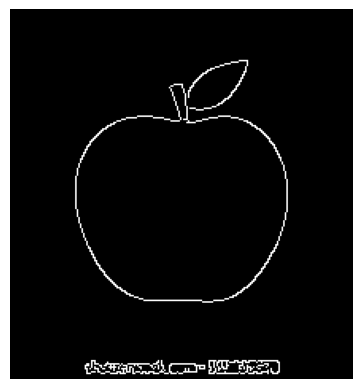

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
[contour perimeter : 462.6389187755983 ]


In [42]:
# points = 80
# sz = original_image.shape
# x_coordinates = np.zeros(points, dtype=int)
# y_coordinates = np.zeros(points, dtype=int)
# circle_contour((sz[1]//2, sz[0]//2-40), 100, points, x_coordinates, y_coordinates)
# output = greedy_contour(original_image, 50, 1, 2, 5, x_coordinates, y_coordinates, points, 11, True)

import cv2
import numpy as np

X= 0
Y = 0

def test_contours():
    # active contour
    original_image = cv2.imread("images/apple3.jpeg")
    points = 60
    sz = original_image.shape
    x_cooridinates = np.zeros(points, dtype=np.int32)
    y_cooridinates = np.zeros(points, dtype=np.int32)
    x_cooridinates,y_cooridinates = circle_contour((sz[0] // 2+10, sz[1] // 2+50), 50, points, x_cooridinates, y_cooridinates)
    # greedy_contour(original_image, 100, 2, 0.9, 20, x_cooridinates, y_cooridinates, points, 5)
    x_cooridinates,y_cooridinates = greedy_contour(original_image, 25, 1, 2, 5, x_cooridinates, y_cooridinates, points, 11, True)
    # external_energy(original_image)
    
    # calculate area of the contour
    perimeter = contour_perimeter(x_cooridinates, y_cooridinates, points)
    # area = contour_area(points, x_cooridinates, y_cooridinates)
    draw_contour(original_image,points,x_cooridinates,y_cooridinates)
    print(f"[contour perimeter : {perimeter} ]")
    global X
    X = x_cooridinates
    global Y
    Y = y_cooridinates
    
test_contours()


In [57]:
import numpy as np
def normaliseToRotation(chain_code):
    # Make a copy of the chain code list
    normalized_code = chain_code.copy()
    # Iterate through the chain code list
    for i in range(len(chain_code)):
        # Subtract the current chain code symbol from the next symbol
        difference = chain_code[(i+1)%len(chain_code)] - chain_code[i]
        # Modulo the difference by 8 to normalize it
        normalized_difference = difference % 8
        # Replace the original symbol with the normalized symbol
        normalized_code[(i+1)%len(chain_code)] = normalized_difference
    # Return the normalized chain code list
    return normalized_code

def convert(list):
	
	# Converting integer list to string list
	s = [str(i) for i in list]
	
	# Join list items using join()
	res = int("".join(s))
	
	return(res)
def getAllOccurences(lst,val):
    ret = []
    for i,value in enumerate(lst):
        if value == val:
            ret.append(i)
    return ret
def normaliseToStartingPoint(chaincode):
    sortedLst = sorted(chaincode)
    occurencesOfMinIndices = getAllOccurences(chaincode,sortedLst[0])
    mn = 10**(len(chaincode)+1)
    normalisedChainCode = []
    for i in occurencesOfMinIndices:
        rotated_lst = chaincode[i:] + chaincode[:i]
        intgr = convert(rotated_lst)
        if intgr < mn:
             normalisedChainCode = rotated_lst
             mn = intgr
    return normalisedChainCode

def parametersToAppend(mulByMn,mulByDx,mulByDy,mn,dx,dy):
    codeList = []
    codeList += [mulByMn]*mn
    dx = np.abs(dx) - mn
    dy = np.abs(dy) - mn
    codeList += [mulByDx] * dx
    codeList += [mulByDy] * dy
    return codeList

def getCodeBetweenTwoPoints(x1,y1,x2,y2):
    dx = x2-x1
    dy = y2-y1
    mn = min(np.abs(dx),np.abs(dy))
    codeList = []
    if dx > 0 and dy > 0:
        codeList += parametersToAppend(1,0,2,mn,dx,dy)
    elif dx < 0 and dy > 0:
        codeList += parametersToAppend(3,4,2,mn,dx,dy)
    elif dx <0 and dy < 0:
        codeList += parametersToAppend(5,4,6,mn,dx,dy)
    else:
        codeList += parametersToAppend(7,0,6,mn,dx,dy)
    # print(x1,y1,x2,y2,codeList)
    return codeList

def getChainCode(contourX,contourY):
    numOfPoints = len(contourX)
    listToReturn = []
    for i in range(0,numOfPoints):
        listToReturn += getCodeBetweenTwoPoints(contourX[i % numOfPoints],contourY[i % numOfPoints],contourX[(i+1)%numOfPoints],contourY[(i+1)%numOfPoints])
    normalisedToRotation = normaliseToRotation(chaincode)
    normalisedToStartingPoint = normaliseToStartingPoint(normalisedToRotation)
    return normalisedToStartingPoint

chaincode = getChainCode(X,Y)
# print(X,Y)
print(chaincode)
print(len(chaincode))


178 72 180 75 [1, 1, 2]
180 75 177 70 [5, 5, 5, 6, 6]
177 70 176 69 [5]
176 69 172 64 [5, 5, 5, 5, 6]
172 64 171 64 [0]
171 64 165 58 [5, 5, 5, 5, 5, 5]
165 58 169 61 [1, 1, 1, 0]
169 61 171 63 [1, 1]
171 63 175 67 [1, 1, 1, 1]
175 67 175 67 []
175 67 173 65 [5, 5]
173 65 171 63 [5, 5]
171 63 169 61 [5, 5]
169 61 168 60 [5]
168 60 165 58 [5, 5, 4]
165 58 164 57 [5]
164 57 161 55 [5, 5, 4]
161 55 160 54 [5]
160 54 156 52 [5, 5, 4, 4]
156 52 152 50 [5, 5, 4, 4]
152 50 148 48 [5, 5, 4, 4]
148 48 140 45 [5, 5, 5, 4, 4, 4, 4, 4]
140 45 130 42 [5, 5, 5, 4, 4, 4, 4, 4, 4, 4]
130 42 121 41 [5, 4, 4, 4, 4, 4, 4, 4, 4]
121 41 109 41 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
109 41 99 43 [3, 3, 4, 4, 4, 4, 4, 4, 4, 4]
99 43 91 46 [3, 3, 3, 4, 4, 4, 4, 4]
91 46 84 50 [3, 3, 3, 3, 4, 4, 4]
84 50 78 56 [3, 3, 3, 3, 3, 3]
78 56 73 63 [3, 3, 3, 3, 3, 2, 2]
73 63 69 72 [3, 3, 3, 3, 2, 2, 2, 2, 2]
69 72 67 82 [3, 3, 2, 2, 2, 2, 2, 2, 2, 2]
67 82 68 91 [1, 2, 2, 2, 2, 2, 2, 2, 2]
68 91 70 102 [1, 1, 2, 2, 2, 

In [48]:


# Example usage:
my_chain_code = [1, 3, 3, 2, 2, 1, 1, 0, 7, 7, 6, 6, 5, 5, 4, 4]
#               [5, 2, 0, 7, 0, 7, 0, 7, 7, 0, 7, 0, 7, 0, 7, 0]
normalized_code = normalize_chain_code(chaincode)
print(normalized_code)  # Output: [1, 2, 0, 6, 0, 7, 0, 7, 7, 6, 6, 5, 5, 4, 4, 4]


[3, 0, 1, 3, 0, 0, 1, 0, 7, 0, 0, 0, 0, 1, 2, 5, 0, 0, 0, 0, 0, 4, 0, 0, 7, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 7, 1, 0, 0, 7, 0, 1, 0, 7, 0, 1, 0, 7, 0, 1, 0, 0, 7, 0, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 7, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 1, 0, 0, 0, 7, 0, 0, 0, 0, 1, 0, 7, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 1, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 7, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 1, 0, 0, 3, 1, 3, 0, 0, 1, 0, 3, 0, 1, 3, 0, 0, 1, 

In [53]:

# Example usage:
my_chain_code = [1, 3, 3, 2, 2, 1, 1, 0, 7, 7, 6, 6,0,0, 5, 5, 4, 4]
# [7, 7, 0, 7, 0, 7, 0, 7, 0, 5, 2, 0, 7, 0, 7, 0]
normalized_code = normalize_chain_code(my_chain_code)
print(normalized_code)  # Output: [2, 0, 6, 0, 7, 0, 7, 7, 6, 6, 5, 5, 4, 4, 4, 1]

c = normaliseToStartingPoint(my_chain_code)
print(c)

[7, 7, 0, 7, 0, 2, 0, 5, 0, 7, 0, 5, 2, 0, 7, 0, 7, 0]
[0, 0, 5, 5, 4, 4, 1, 3, 3, 2, 2, 1, 1, 0, 7, 7, 6, 6]


In [46]:
def rotate_array_to_minimum(lst):
    # Sort the list in ascending order
    sorted_lst = sorted(lst)
    print(sorted_lst)
    # Find the index of the minimum element in the sorted list
    min_index = lst.index(sorted_lst[0])
    print(min_index)
    # Rotate the original list by the number of positions needed to move the minimum element to the beginning
    rotated_lst = lst[min_index:] + lst[:min_index]
    return rotated_lst

# Example usage:
my_list = [5, 7, 2, 8, 4,2,2]
rotated_list = rotate_array_to_minimum(my_list)
print(rotated_list)  # Output: [2, 8, 4, 5, 7]


[2, 2, 2, 4, 5, 7, 8]
2
[2, 8, 4, 2, 2, 5, 7]
